## Text를 데이터로

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


In [2]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


In [3]:
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


In [5]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


In [6]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [8]:
# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


## 임베딩 레이어

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index))
raw_inputs = keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


In [10]:
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[ 0.04378034 -0.03371773 -0.01984987 -0.00285923]
  [-0.04808449  0.0025991  -0.02751175 -0.01471026]
  [-0.00929161 -0.04194347  0.02199142  0.01699494]
  [ 0.03624152 -0.0423796  -0.00343906 -0.00925913]
  [ 0.03577541  0.01748356 -0.0236531   0.03974633]]

 [[ 0.04378034 -0.03371773 -0.01984987 -0.00285923]
  [-0.04808449  0.0025991  -0.02751175 -0.01471026]
  [ 0.01755496 -0.02279428 -0.03736581 -0.00739583]
  [ 0.02858224 -0.03328326  0.0350509  -0.0188911 ]
  [ 0.03577541  0.01748356 -0.0236531   0.03974633]]

 [[ 0.04378034 -0.03371773 -0.01984987 -0.00285923]
  [ 0.01957137 -0.02543417 -0.00650746  0.02505204]
  [-0.04808449  0.0025991  -0.02751175 -0.01471026]
  [-0.00929161 -0.04194347  0.02199142  0.01699494]
  [ 0.00899283 -0.04862361  0.02768515 -0.04123863]]], shape=(3, 5, 4), dtype=float32)


## 시퀀스 데이터를 다루는 모델 - LSTM

In [11]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 어휘 사전의 크기입니다(10개의 단어)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경가능)
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


## 시퀀스 데이터를 다루는 모델 - cnn1d

In [12]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 어휘 사전의 크기입니다(10개의 단어)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

## 시퀀스 데이터를 다루는 모델 - global max pooling

In [13]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 어휘 사전의 크기입니다(10개의 단어)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 분석

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)
imdb = keras.datasets.imdb

# IMDB 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

2.2.0
훈련 샘플 개수: 25000, 테스트 개수: 25000


In [12]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))
print(y_train)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189
[1 0 0 ... 0 1 

In [13]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


In [14]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word[0] = "<PAD>"
index_to_word[1] = "<BOS>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.
print(len(index_to_word))

<BOS>
4
the
88588


In [15]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [16]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


In [17]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


In [21]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [18]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.5038
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6926 - accuracy: 0.5126 - val_loss: 0.6929 - val_accuracy: 0.5026
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6918 - accuracy: 0.5139 - val_loss: 0.6925 - val_accuracy: 0.5031
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6889 - accuracy: 0.5162 - val_loss: 0.6903 - val_accuracy: 0.5048
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6801 - accuracy: 0.5239 - val_loss: 0.6848 - val_accuracy: 0.5190
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6704 - accuracy: 0.5360 - val_loss: 0.6927 - val_accuracy: 0.5129
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6656 - accuracy: 0.5399 - val_loss: 0.6825 - val_accuracy: 0.5179
Epoch 8/20
30

In [24]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 5s - loss: 0.6999 - accuracy: 0.5177
[0.6999092698097229, 0.5177199840545654]


In [25]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


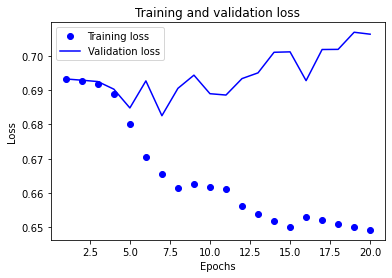

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

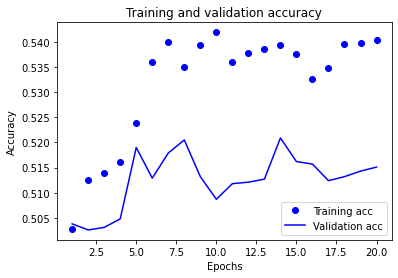

In [27]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [19]:
import os

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

NameError: name 'model' is not defined

In [30]:
#!pip install gensim
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.00586249, -0.01583305,  0.01958807, -0.03897187,  0.01405035,
       -0.06888697,  0.01341382,  0.03567697,  0.06927241, -0.00341208,
       -0.00079158,  0.01316665,  0.01833537,  0.05516416,  0.04834705,
       -0.01619362], dtype=float32)

In [31]:
word_vectors.similar_by_word("love")

[('comment', 0.9544352293014526),
 ('events', 0.9378311038017273),
 ('seemed', 0.9371362328529358),
 ('portrayal', 0.9348063468933105),
 ('genuine', 0.9278603792190552),
 ('great', 0.9255738258361816),
 ('chemistry', 0.9219061732292175),
 ('chris', 0.9213999509811401),
 ('harry', 0.9198406934738159),
 ('counter', 0.9165128469467163)]

In [20]:
import os
from gensim.models import KeyedVectors
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [21]:
word2vec.vectors.shape

(3000000, 300)

In [22]:
# word2vec.similar_by_word("love") # 커널 다운됨

In [23]:
import numpy as np
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [36]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant


vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [37]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 24s 789ms/step - loss: 0.6911 - accuracy: 0.5389 - val_loss: 0.6734 - val_accuracy: 0.5876
Epoch 2/20
30/30 [==============================] - 6s 202ms/step - loss: 0.6310 - accuracy: 0.6573 - val_loss: 0.6021 - val_accuracy: 0.6798
Epoch 3/20
30/30 [==============================] - 6s 202ms/step - loss: 0.4870 - accuracy: 0.7887 - val_loss: 0.4168 - val_accuracy: 0.8275
Epoch 4/20
30/30 [==============================] - 6s 216ms/step - loss: 0.3248 - accuracy: 0.8727 - val_loss: 0.3356 - val_accuracy: 0.8619
Epoch 5/20
30/30 [==============================] - 6s 209ms/step - loss: 0.2331 - accuracy: 0.9135 - val_loss: 0.3114 - val_accuracy: 0.8670
Epoch 6/20
30/30 [==============================] - 6s 204ms/step - loss: 0.1677 - accuracy: 0.9459 - val_loss: 0.3029 - val_accuracy: 0.8738
Epoch 7/20
30/30 [==============================] - 6s 206ms/step - loss: 0.1259 - accuracy: 0.9645 - val_loss: 0.3610 - val_accuracy: 0.8527
Epoch

In [38]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 9s - loss: 0.4769 - accuracy: 0.8654
[0.47687262296676636, 0.8653600215911865]


## 네이버 영화리뷰 감성분석 도전하기

### 1) 데이터 준비 및 확인

In [1]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 2) 데이터로더 구성

In [ ]:
from konlpy.tag import Mecab
tokenizer = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','다','.','으로','자','에','게','에게','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [19]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [2]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [21]:
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, '<UNUSED>': 3, '영화': 4, '..': 5, '...': 6, ',': 7, '너무': 8, '?': 9, '정말': 10, '적': 11, '만': 12, '진짜': 13, '!': 14, '로': 15, '점': 16, '에서': 17, '연기': 18, '것': 19, '평점': 20, '내': 21, '~': 22, '최고': 23, '나': 24, '그': 25, '안': 26, '인': 27, '이런': 28, '스토리': 29, '생각': 30, '못': 31, '....': 32, '왜': 33, '드라마': 34, '이다': 35, '감동': 36, '사람': 37, '하는': 38, '1': 39, '보고': 40, '하고': 41, '말': 42, '고': 43, '더': 44, '아': 45, '때': 46, '배우': 47, 'ㅋㅋ': 48, '거': 49, '감독': 50, '그냥': 51, '요': 52, '본': 53, '내용': 54, '재미': 55, '중': 56, '뭐': 57, '까지': 58, '!!': 59, '보다': 60, '없는': 61, '시간': 62, '수': 63, '쓰레기': 64, '지': 65, '네': 66, '봤는데': 67, '작품': 68, '10': 69, '사랑': 70, '할': 71, '없다': 72, '하나': 73, '다시': 74, '볼': 75, '마지막': 76, '이건': 77, '좋은': 78, 'ㅋ': 79, '저': 80, '정도': 81, '같은': 82, '입니다': 83, '완전': 84, '있는': 85, '2': 86, 'ㅋㅋㅋ': 87, '처음': 88, '장면': 89, '액션': 90, '주인공': 91, '대': 92, '걸': 93, '이렇게': 94, '보는': 95, '개': 96, 'ㅠㅠ': 97, '3': 98, "'": 99, '지금': 100, '돈': 101, '

In [22]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  12.073610492528374
문장길이 최대 :  95
문장길이 표준편차 :  9.759447201203077
pad_sequences maxlen :  31
전체 문장의 0.9348056455700091%가 maxlen 설정값 이내에 포함됩니다. 


In [23]:
X_train[0]

[45, 446, 5, 13, 7135, 665]

In [24]:
X_train[1]

[931, 6, 447, 40, 613, 4, 199, 32, 1597, 18, 991, 6288, 2]

In [25]:
x_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

In [26]:
x_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

In [27]:
x_train.shape

(146182, 31)

In [28]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

### Global max plooing

Epoch 1/10
266/266 [==============================] - 2s 8ms/step - loss: 0.4842 - accuracy: 0.8006 - val_loss: 0.3483 - val_accuracy: 0.8454
Epoch 2/10
266/266 [==============================] - 2s 8ms/step - loss: 0.3211 - accuracy: 0.8629 - val_loss: 0.3311 - val_accuracy: 0.8548
Epoch 3/10
266/266 [==============================] - 2s 8ms/step - loss: 0.2785 - accuracy: 0.8849 - val_loss: 0.3319 - val_accuracy: 0.8577
Epoch 4/10
266/266 [==============================] - 2s 8ms/step - loss: 0.2452 - accuracy: 0.9015 - val_loss: 0.3407 - val_accuracy: 0.8540
Epoch 5/10
266/266 [==============================] - 2s 8ms/step - loss: 0.2140 - accuracy: 0.9169 - val_loss: 0.3568 - val_accuracy: 0.8540
Epoch 6/10
266/266 [==============================] - 2s 9ms/step - loss: 0.1827 - accuracy: 0.9317 - val_loss: 0.3754 - val_accuracy: 0.8506
Epoch 7/10
266/266 [==============================] - 2s 9ms/step - loss: 0.1514 - accuracy: 0.9459 - val_loss: 0.4055 - val_accuracy: 0.8487
Epoch 

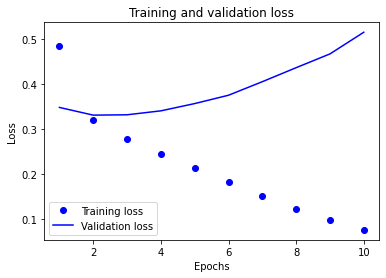

In [13]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Conv 1d

Epoch 1/10
266/266 [==============================] - 10s 39ms/step - loss: 0.4388 - accuracy: 0.7913 - val_loss: 0.3364 - val_accuracy: 0.8514
Epoch 2/10
266/266 [==============================] - 3s 10ms/step - loss: 0.3006 - accuracy: 0.8732 - val_loss: 0.3195 - val_accuracy: 0.8623
Epoch 3/10
266/266 [==============================] - 2s 9ms/step - loss: 0.2424 - accuracy: 0.9030 - val_loss: 0.3326 - val_accuracy: 0.8580
Epoch 4/10
266/266 [==============================] - 3s 9ms/step - loss: 0.1768 - accuracy: 0.9347 - val_loss: 0.3715 - val_accuracy: 0.8529
Epoch 5/10
266/266 [==============================] - 3s 10ms/step - loss: 0.1143 - accuracy: 0.9613 - val_loss: 0.4554 - val_accuracy: 0.8457
Epoch 6/10
266/266 [==============================] - 3s 10ms/step - loss: 0.0741 - accuracy: 0.9766 - val_loss: 0.5396 - val_accuracy: 0.8437
Epoch 7/10
266/266 [==============================] - 2s 9ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.6142 - val_accuracy: 0.8391
E

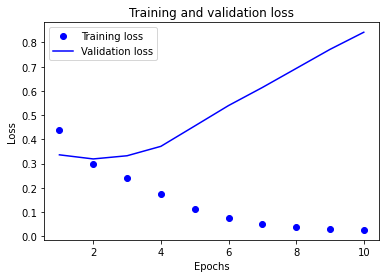

In [14]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### LSTM

Epoch 1/10
266/266 [==============================] - 3s 11ms/step - loss: 0.4505 - accuracy: 0.8062 - val_loss: 0.3458 - val_accuracy: 0.8501
Epoch 2/10
266/266 [==============================] - 3s 10ms/step - loss: 0.3268 - accuracy: 0.8627 - val_loss: 0.3353 - val_accuracy: 0.8537
Epoch 3/10
266/266 [==============================] - 3s 10ms/step - loss: 0.3012 - accuracy: 0.8745 - val_loss: 0.3331 - val_accuracy: 0.8577
Epoch 4/10
266/266 [==============================] - 3s 10ms/step - loss: 0.2817 - accuracy: 0.8842 - val_loss: 0.3370 - val_accuracy: 0.8578
Epoch 5/10
266/266 [==============================] - 3s 10ms/step - loss: 0.2627 - accuracy: 0.8934 - val_loss: 0.3401 - val_accuracy: 0.8580
Epoch 6/10
266/266 [==============================] - 3s 10ms/step - loss: 0.2452 - accuracy: 0.9019 - val_loss: 0.3457 - val_accuracy: 0.8573
Epoch 7/10
266/266 [==============================] - 3s 10ms/step - loss: 0.2282 - accuracy: 0.9094 - val_loss: 0.3583 - val_accuracy: 0.8589

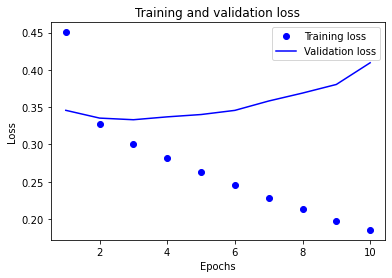

In [15]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100 # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 워드 임베딩 적용하기

In [29]:
import os
import numpy as np
import gensim

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
word2vec.wv.vectors.shape

(30185, 200)

In [30]:
word2vec.wv.most_similar("ㅠㅠ")

[('...', 0.673183798789978),
 ('부탁드리', 0.6507028937339783),
 ('그럼', 0.6458038091659546),
 ('아무래도', 0.629248857498169),
 ('....', 0.6187001466751099),
 ('..', 0.5995675325393677),
 ('어차피', 0.5979518890380859),
 ('이야', 0.5854140520095825),
 ('제발', 0.5693918466567993),
 ('반갑', 0.5651735067367554)]

In [31]:

vocab_size = 10000 
word_vector_dim = 200  # 워드 벡터의 차원수 (30185,200)

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Epoch 1/10
266/266 [==============================] - 5s 17ms/step - loss: 0.6997 - accuracy: 0.5536 - val_loss: 0.6430 - val_accuracy: 0.6299
Epoch 2/10
266/266 [==============================] - 5s 17ms/step - loss: 0.5866 - accuracy: 0.6889 - val_loss: 0.5431 - val_accuracy: 0.7275
Epoch 3/10
266/266 [==============================] - 5s 17ms/step - loss: 0.5075 - accuracy: 0.7526 - val_loss: 0.4877 - val_accuracy: 0.7673
Epoch 4/10
266/266 [==============================] - 5s 18ms/step - loss: 0.4578 - accuracy: 0.7841 - val_loss: 0.4607 - val_accuracy: 0.7837
Epoch 5/10
266/266 [==============================] - 4s 17ms/step - loss: 0.4238 - accuracy: 0.8050 - val_loss: 0.4320 - val_accuracy: 0.7973
Epoch 6/10
266/266 [==============================] - 5s 18ms/step - loss: 0.3976 - accuracy: 0.8199 - val_loss: 0.4192 - val_accuracy: 0.8037
Epoch 7/10
266/266 [==============================] - 5s 18ms/step - loss: 0.3771 - accuracy: 0.8321 - val_loss: 0.4080 - val_accuracy: 0.8098

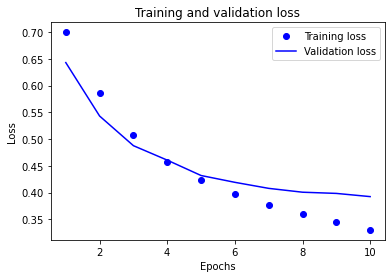

In [19]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/10
266/266 [==============================] - 10s 37ms/step - loss: 0.5534 - accuracy: 0.6905 - val_loss: 0.4290 - val_accuracy: 0.8071
Epoch 2/10
266/266 [==============================] - 5s 19ms/step - loss: 0.3782 - accuracy: 0.8320 - val_loss: 0.3653 - val_accuracy: 0.8431
Epoch 3/10
266/266 [==============================] - 5s 20ms/step - loss: 0.3215 - accuracy: 0.8632 - val_loss: 0.3486 - val_accuracy: 0.8514
Epoch 4/10
266/266 [==============================] - 5s 19ms/step - loss: 0.2897 - accuracy: 0.8795 - val_loss: 0.3512 - val_accuracy: 0.8462
Epoch 5/10
266/266 [==============================] - 5s 19ms/step - loss: 0.2653 - accuracy: 0.8915 - val_loss: 0.3594 - val_accuracy: 0.8451
Epoch 6/10
266/266 [==============================] - 5s 19ms/step - loss: 0.2445 - accuracy: 0.9025 - val_loss: 0.3641 - val_accuracy: 0.8465
Epoch 7/10
266/266 [==============================] - 5s 18ms/step - loss: 0.2239 - accuracy: 0.9136 - val_loss: 0.3816 - val_accuracy: 0.842

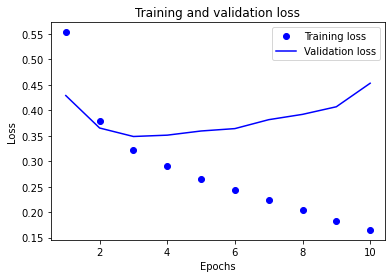

In [20]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))    

model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 모델 구조 변경(1)

Epoch 1/20
266/266 [==============================] - 22s 83ms/step - loss: 0.4871 - accuracy: 0.7602 - val_loss: 0.3690 - val_accuracy: 0.8373
Epoch 2/20
266/266 [==============================] - 22s 82ms/step - loss: 0.3671 - accuracy: 0.8358 - val_loss: 0.3304 - val_accuracy: 0.8543
Epoch 3/20
266/266 [==============================] - 22s 81ms/step - loss: 0.3234 - accuracy: 0.8595 - val_loss: 0.3176 - val_accuracy: 0.8639
Epoch 4/20
266/266 [==============================] - 22s 81ms/step - loss: 0.2967 - accuracy: 0.8727 - val_loss: 0.3066 - val_accuracy: 0.8690
Epoch 5/20
266/266 [==============================] - 22s 82ms/step - loss: 0.2748 - accuracy: 0.8838 - val_loss: 0.3026 - val_accuracy: 0.8712
Epoch 6/20
266/266 [==============================] - 22s 82ms/step - loss: 0.2560 - accuracy: 0.8922 - val_loss: 0.3059 - val_accuracy: 0.8754
Epoch 7/20
266/266 [==============================] - 22s 83ms/step - loss: 0.2392 - accuracy: 0.9002 - val_loss: 0.3132 - val_accuracy:

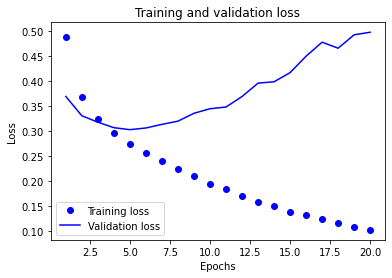

In [19]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.LSTM(200,dropout=0.2,recurrent_dropout=0.2))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 모델 구조 변경(2)

Epoch 1/30
266/266 [==============================] - 19s 72ms/step - loss: 0.5548 - accuracy: 0.7052 - val_loss: 0.4167 - val_accuracy: 0.8105
Epoch 2/30
266/266 [==============================] - 19s 71ms/step - loss: 0.4113 - accuracy: 0.8130 - val_loss: 0.3539 - val_accuracy: 0.8371
Epoch 3/30
266/266 [==============================] - 19s 73ms/step - loss: 0.3621 - accuracy: 0.8387 - val_loss: 0.3365 - val_accuracy: 0.8484
Epoch 4/30
266/266 [==============================] - 19s 71ms/step - loss: 0.3422 - accuracy: 0.8487 - val_loss: 0.3344 - val_accuracy: 0.8526
Epoch 5/30
266/266 [==============================] - 19s 71ms/step - loss: 0.3284 - accuracy: 0.8560 - val_loss: 0.3315 - val_accuracy: 0.8518
Epoch 6/30
266/266 [==============================] - 19s 72ms/step - loss: 0.3168 - accuracy: 0.8620 - val_loss: 0.3302 - val_accuracy: 0.8553
Epoch 7/30
266/266 [==============================] - 19s 73ms/step - loss: 0.3085 - accuracy: 0.8651 - val_loss: 0.3268 - val_accuracy:

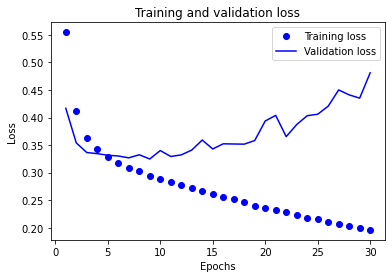

In [33]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.LSTM(200,dropout=0.5,recurrent_dropout=0.5))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=30

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 하이퍼 파라미터 변경(1)

Epoch 1/30
266/266 [==============================] - 20s 74ms/step - loss: 0.5806 - accuracy: 0.6856 - val_loss: 0.4859 - val_accuracy: 0.7561
Epoch 2/30
266/266 [==============================] - 19s 72ms/step - loss: 0.4555 - accuracy: 0.7841 - val_loss: 0.4399 - val_accuracy: 0.7885
Epoch 3/30
266/266 [==============================] - 19s 72ms/step - loss: 0.3928 - accuracy: 0.8209 - val_loss: 0.3658 - val_accuracy: 0.8381
Epoch 4/30
266/266 [==============================] - 20s 74ms/step - loss: 0.3580 - accuracy: 0.8398 - val_loss: 0.3397 - val_accuracy: 0.8467
Epoch 5/30
266/266 [==============================] - 19s 73ms/step - loss: 0.3392 - accuracy: 0.8508 - val_loss: 0.3409 - val_accuracy: 0.8489
Epoch 6/30
266/266 [==============================] - 19s 73ms/step - loss: 0.3249 - accuracy: 0.8572 - val_loss: 0.3234 - val_accuracy: 0.8553
Epoch 7/30
266/266 [==============================] - 19s 72ms/step - loss: 0.3143 - accuracy: 0.8634 - val_loss: 0.3293 - val_accuracy:

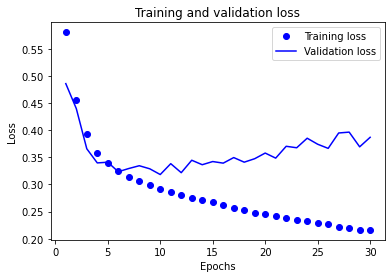

In [32]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.LSTM(300,dropout=0.5,recurrent_dropout=0.5))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=30

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 하이퍼 파라미터 변경(2)

Epoch 1/30
266/266 [==============================] - 17s 65ms/step - loss: 0.6055 - accuracy: 0.6634 - val_loss: 0.4755 - val_accuracy: 0.7671
Epoch 2/30
266/266 [==============================] - 17s 64ms/step - loss: 0.4751 - accuracy: 0.7769 - val_loss: 0.3976 - val_accuracy: 0.8147
Epoch 3/30
266/266 [==============================] - 17s 63ms/step - loss: 0.4068 - accuracy: 0.8176 - val_loss: 0.3618 - val_accuracy: 0.8351
Epoch 4/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3707 - accuracy: 0.8371 - val_loss: 0.3487 - val_accuracy: 0.8424
Epoch 5/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3510 - accuracy: 0.8481 - val_loss: 0.3347 - val_accuracy: 0.8512
Epoch 6/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3380 - accuracy: 0.8535 - val_loss: 0.3323 - val_accuracy: 0.8534
Epoch 7/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3273 - accuracy: 0.8592 - val_loss: 0.3360 - val_accuracy:

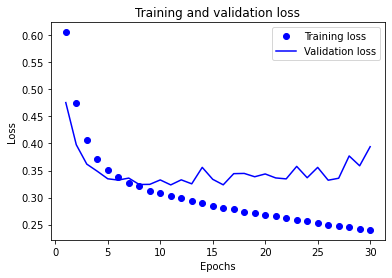

In [33]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.LSTM(200,dropout=0.5,recurrent_dropout=0.5))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=30

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 하이퍼 파라미터 변경(3)

Epoch 1/30
266/266 [==============================] - 17s 64ms/step - loss: 0.6428 - accuracy: 0.6210 - val_loss: 0.5242 - val_accuracy: 0.7426
Epoch 2/30
266/266 [==============================] - 17s 64ms/step - loss: 0.5293 - accuracy: 0.7397 - val_loss: 0.4539 - val_accuracy: 0.7818
Epoch 3/30
266/266 [==============================] - 17s 63ms/step - loss: 0.4528 - accuracy: 0.7905 - val_loss: 0.3980 - val_accuracy: 0.8230
Epoch 4/30
266/266 [==============================] - 17s 63ms/step - loss: 0.4099 - accuracy: 0.8148 - val_loss: 0.3663 - val_accuracy: 0.8362
Epoch 5/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3848 - accuracy: 0.8293 - val_loss: 0.3624 - val_accuracy: 0.8408
Epoch 6/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3685 - accuracy: 0.8381 - val_loss: 0.3586 - val_accuracy: 0.8470
Epoch 7/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3568 - accuracy: 0.8445 - val_loss: 0.3399 - val_accuracy:

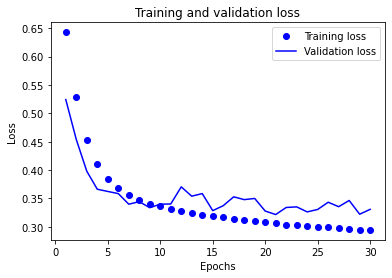

In [34]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.LSTM(200,dropout=0.7,recurrent_dropout=0.7))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=30

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 모델구조변경(3)

Epoch 1/30
266/266 [==============================] - 17s 64ms/step - loss: 0.6751 - accuracy: 0.5667 - val_loss: 0.5815 - val_accuracy: 0.7161
Epoch 2/30
266/266 [==============================] - 17s 63ms/step - loss: 0.5712 - accuracy: 0.7092 - val_loss: 0.4635 - val_accuracy: 0.7892
Epoch 3/30
266/266 [==============================] - 17s 63ms/step - loss: 0.4811 - accuracy: 0.7744 - val_loss: 0.3941 - val_accuracy: 0.8210
Epoch 4/30
266/266 [==============================] - 17s 63ms/step - loss: 0.4303 - accuracy: 0.8058 - val_loss: 0.3685 - val_accuracy: 0.8329
Epoch 5/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3993 - accuracy: 0.8240 - val_loss: 0.3553 - val_accuracy: 0.8418
Epoch 6/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3815 - accuracy: 0.8344 - val_loss: 0.3553 - val_accuracy: 0.8443
Epoch 7/30
266/266 [==============================] - 17s 63ms/step - loss: 0.3699 - accuracy: 0.8403 - val_loss: 0.3645 - val_accuracy:

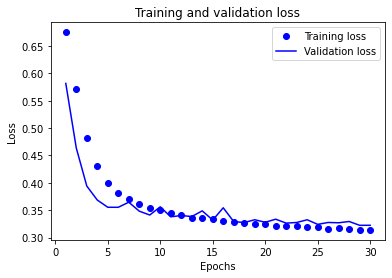

In [35]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.LSTM(200,dropout=0.7,recurrent_dropout=0.7))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=30

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 에포크 변경

Epoch 1/200
266/266 [==============================] - 17s 64ms/step - loss: 0.6752 - accuracy: 0.5680 - val_loss: 0.6391 - val_accuracy: 0.6272
Epoch 2/200
266/266 [==============================] - 17s 64ms/step - loss: 0.5680 - accuracy: 0.7108 - val_loss: 0.4764 - val_accuracy: 0.7885
Epoch 3/200
266/266 [==============================] - 17s 63ms/step - loss: 0.4831 - accuracy: 0.7740 - val_loss: 0.5607 - val_accuracy: 0.7595
Epoch 4/200
266/266 [==============================] - 17s 63ms/step - loss: 0.4301 - accuracy: 0.8064 - val_loss: 0.3734 - val_accuracy: 0.8306
Epoch 5/200
266/266 [==============================] - 17s 64ms/step - loss: 0.4005 - accuracy: 0.8243 - val_loss: 0.3531 - val_accuracy: 0.8442
Epoch 6/200
266/266 [==============================] - 17s 63ms/step - loss: 0.3818 - accuracy: 0.8346 - val_loss: 0.3475 - val_accuracy: 0.8456
Epoch 7/200
266/266 [==============================] - 17s 63ms/step - loss: 0.3689 - accuracy: 0.8410 - val_loss: 0.3658 - val_ac

266/266 [==============================] - 17s 63ms/step - loss: 0.3042 - accuracy: 0.8771 - val_loss: 0.3197 - val_accuracy: 0.8636
Epoch 57/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3050 - accuracy: 0.8759 - val_loss: 0.3245 - val_accuracy: 0.8635
Epoch 58/200
266/266 [==============================] - 17s 65ms/step - loss: 0.3035 - accuracy: 0.8763 - val_loss: 0.3222 - val_accuracy: 0.8616
Epoch 59/200
266/266 [==============================] - 17s 63ms/step - loss: 0.3047 - accuracy: 0.8761 - val_loss: 0.3172 - val_accuracy: 0.8626
Epoch 60/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3034 - accuracy: 0.8766 - val_loss: 0.3192 - val_accuracy: 0.8625
Epoch 61/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3025 - accuracy: 0.8760 - val_loss: 0.3199 - val_accuracy: 0.8636
Epoch 62/200
266/266 [==============================] - 17s 63ms/step - loss: 0.3033 - accuracy: 0.8759 - val_loss: 0.3268 - val_accuracy

266/266 [==============================] - 17s 63ms/step - loss: 0.3094 - accuracy: 0.8797 - val_loss: 0.3204 - val_accuracy: 0.8628
Epoch 113/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3044 - accuracy: 0.8798 - val_loss: 0.3237 - val_accuracy: 0.8617
Epoch 114/200
266/266 [==============================] - 17s 63ms/step - loss: 0.3012 - accuracy: 0.8798 - val_loss: 0.3234 - val_accuracy: 0.8582
Epoch 115/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3039 - accuracy: 0.8791 - val_loss: 0.3215 - val_accuracy: 0.8628
Epoch 116/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3051 - accuracy: 0.8790 - val_loss: 0.3313 - val_accuracy: 0.8628
Epoch 117/200
266/266 [==============================] - 17s 63ms/step - loss: 0.3025 - accuracy: 0.8807 - val_loss: 0.3208 - val_accuracy: 0.8592
Epoch 118/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3031 - accuracy: 0.8795 - val_loss: 0.3226 - val_ac

Epoch 168/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3162 - accuracy: 0.8770 - val_loss: 0.3345 - val_accuracy: 0.8604
Epoch 169/200
266/266 [==============================] - 17s 63ms/step - loss: 0.3166 - accuracy: 0.8757 - val_loss: 0.3236 - val_accuracy: 0.8600
Epoch 170/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3172 - accuracy: 0.8782 - val_loss: 0.3246 - val_accuracy: 0.8599
Epoch 171/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3095 - accuracy: 0.8776 - val_loss: 0.3314 - val_accuracy: 0.8594
Epoch 172/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3215 - accuracy: 0.8769 - val_loss: 0.3231 - val_accuracy: 0.8612
Epoch 173/200
266/266 [==============================] - 17s 63ms/step - loss: 0.3102 - accuracy: 0.8767 - val_loss: 0.3321 - val_accuracy: 0.8584
Epoch 174/200
266/266 [==============================] - 17s 64ms/step - loss: 0.3146 - accuracy: 0.8758 - val_loss: 0

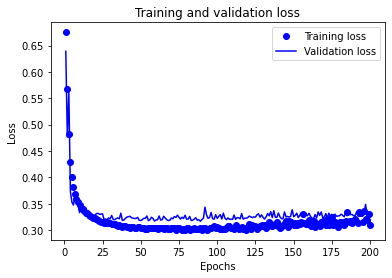

In [36]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.LSTM(200,dropout=0.7,recurrent_dropout=0.7))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=200

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Okt에서 Mecab으로 변경

In [3]:
from konlpy.tag import Mecab
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','다','.','으로','자','에','게','에게','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [4]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [5]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  14.13662402285258
문장길이 최대 :  115
문장길이 표준편차 :  11.547022625034977
pad_sequences maxlen :  37
전체 문장의 0.9359114155391397%가 maxlen 설정값 이내에 포함됩니다. 


In [6]:
x_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

In [7]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

In [8]:
import os
import numpy as np
import gensim

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
word2vec.wv.vectors.shape

(30185, 200)

In [9]:

vocab_size = 10000 
word_vector_dim = 200  # 워드 벡터의 차원수 (30185,200)

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Epoch 1/30
266/266 [==============================] - 19s 73ms/step - loss: 0.5414 - accuracy: 0.7217 - val_loss: 0.4425 - val_accuracy: 0.7917
Epoch 2/30
266/266 [==============================] - 19s 73ms/step - loss: 0.4306 - accuracy: 0.8026 - val_loss: 0.3696 - val_accuracy: 0.8356
Epoch 3/30
266/266 [==============================] - 19s 73ms/step - loss: 0.3829 - accuracy: 0.8303 - val_loss: 0.3648 - val_accuracy: 0.8405
Epoch 4/30
266/266 [==============================] - 20s 73ms/step - loss: 0.3540 - accuracy: 0.8450 - val_loss: 0.3310 - val_accuracy: 0.8568
Epoch 5/30
266/266 [==============================] - 20s 73ms/step - loss: 0.3351 - accuracy: 0.8566 - val_loss: 0.3237 - val_accuracy: 0.8628
Epoch 6/30
266/266 [==============================] - 19s 73ms/step - loss: 0.3211 - accuracy: 0.8631 - val_loss: 0.3193 - val_accuracy: 0.8626
Epoch 7/30
266/266 [==============================] - 20s 73ms/step - loss: 0.3095 - accuracy: 0.8688 - val_loss: 0.3156 - val_accuracy:

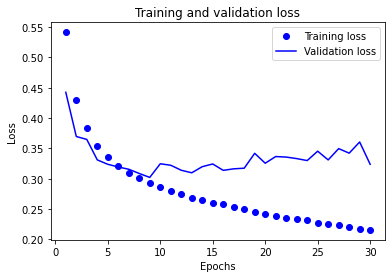

In [10]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(keras.layers.LSTM(200,dropout=0.5,recurrent_dropout=0.5))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=30

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test,  y_test, verbose=2)

print("results",results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###### 노드에 나와 있는 것 외에도 여러가지 바꿔봤지만 87% 정도가 최대였다. 위의 실험에서는 Okt보다 Mecab의 정확도가 높았다.
###### 인터넷에서 찾아보니 SKTBrain의 KOBERT가 90%를 달성했다고 한다. 